In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.utils import combine_prediction_files, compute_network_avg_prediction
from src import plotting #import r2_boxplots

# Load splits

In [2]:
magdir = '/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes'
p_test_df = pd.read_csv(os.path.join(magdir, 'feature_splits', 'p.test.csv'))
p_2023_df = pd.read_csv(os.path.join(magdir, 'feature_splits','p.20230101.csv'))
s_test_df = pd.read_csv(os.path.join(magdir, 'feature_splits','s.test.csv'))
s_2023_df = pd.read_csv(os.path.join(magdir, 'feature_splits','s.20230101.csv'))
p_train_df = pd.read_csv(os.path.join(magdir, 'feature_splits', 'p.train.csv'))
s_train_df = pd.read_csv(os.path.join(magdir, 'feature_splits','s.train.csv'))

In [3]:
p_test_evids = p_test_df['Evid'].unique()
p_2023_evids = p_2023_df['Evid'].unique()
s_test_evids = s_test_df['Evid'].unique()
s_2023_evids = s_2023_df['Evid'].unique()
p_train_evids = p_train_df['Evid'].unique()
s_train_evids = s_train_df['Evid'].unique()

# Load YP21 catalogs

In [4]:
ypml_amps = pd.read_csv(f'../data/catalogs/yellowstone.amps.ypml-v5.2024.csv')

# Load predictions and results for SVMs

In [5]:
lowcorrfeatdir = "lowCorrFeatures_constHP"
selectedfeatdir = "selected_features_constHP"
summfilename = 'all.stat.results.csv'
p_resultsdir = os.path.join(magdir, 'p_models')
s_resultsdir = os.path.join(magdir, 's_models')

In [6]:
p_sub_results = pd.read_csv(os.path.join(p_resultsdir, selectedfeatdir, summfilename))
s_sub_results = pd.read_csv(os.path.join(s_resultsdir, selectedfeatdir, summfilename))

p_lowc_results = pd.read_csv(os.path.join(p_resultsdir, lowcorrfeatdir, summfilename))
s_lowc_results = pd.read_csv(os.path.join(s_resultsdir, lowcorrfeatdir, summfilename))

In [7]:
p_stats = p_test_df.station.unique()
p_sub_test_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, selectedfeatdir),
                                            'P',
                                            'test')

p_sub_2023_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, selectedfeatdir),
                                            'P',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B207.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/H17A.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B208.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B944.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B206.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/selected_features_constHP/B950.P.preds.holdout.csv does not exist, skipping...


In [8]:
p_lowc_test_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, lowcorrfeatdir),
                                            'P',
                                            'test')

p_lowc_2023_preds = combine_prediction_files(p_stats,
                                            os.path.join(p_resultsdir, lowcorrfeatdir),
                                            'P',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/lowCorrFeatures_constHP/B207.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/lowCorrFeatures_constHP/H17A.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/lowCorrFeatures_constHP/B208.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/lowCorrFeatures_constHP/B944.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/lowCorrFeatures_constHP/B206.P.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/p_models/lowCorrFeatures_constHP/B950.P.preds.holdout.csv does not exist, skipping...


In [9]:
s_stats = s_test_df.station.unique()
s_sub_test_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, selectedfeatdir),
                                            'S',
                                            'test')

s_sub_2023_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, selectedfeatdir),
                                            'S',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/B207.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/B206.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/selected_features_constHP/B950.S.preds.holdout.csv does not exist, skipping...


In [10]:
s_lowc_test_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, lowcorrfeatdir),
                                            'S',
                                            'test')

s_lowc_2023_preds = combine_prediction_files(s_stats,
                                            os.path.join(s_resultsdir, lowcorrfeatdir),
                                            'S',
                                            'holdout')

/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/lowCorrFeatures_constHP/B207.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/lowCorrFeatures_constHP/B206.S.preds.holdout.csv does not exist, skipping...
/uufs/chpc.utah.edu/common/home/koper-group3/alysha/magnitudes/s_models/lowCorrFeatures_constHP/B950.S.preds.holdout.csv does not exist, skipping...


# Compute network averages and their $R^2$ values for SVMs

In [11]:
p_lowc_test_avg = compute_network_avg_prediction(p_lowc_test_preds)
p_lowc_2023_avg = compute_network_avg_prediction(p_lowc_2023_preds)

p_sub_test_avg = compute_network_avg_prediction(p_sub_test_preds)
p_sub_2023_avg = compute_network_avg_prediction(p_sub_2023_preds)

In [12]:
s_lowc_test_avg = compute_network_avg_prediction(s_lowc_test_preds)
s_lowc_2023_avg = compute_network_avg_prediction(s_lowc_2023_preds)

s_sub_test_avg = compute_network_avg_prediction(s_sub_test_preds)
s_sub_2023_avg = compute_network_avg_prediction(s_sub_2023_preds)

In [13]:
def get_r2(df):
    return r2_score(df['magnitude'],
                    df['predicted_magnitude'])

In [14]:
p_lowc_test_avg_r2 = get_r2(p_lowc_test_avg)
p_lowc_2023_avg_r2 = get_r2(p_lowc_2023_avg)

p_sub_test_avg_r2 = get_r2(p_sub_test_avg)
p_sub_2023_avg_r2 = get_r2(p_sub_2023_avg)

In [15]:
s_lowc_test_avg_r2 = get_r2(s_lowc_test_avg)
s_lowc_2023_avg_r2 = get_r2(s_lowc_2023_avg)

s_sub_test_avg_r2 = get_r2(s_sub_test_avg)
s_sub_2023_avg_r2 = get_r2(s_sub_2023_avg)

# Load GBT results

In [16]:
gbt_results_dir = 'gbt'
p_gbt_results = pd.read_csv(os.path.join(magdir, gbt_results_dir, 'r2.summary.P.csv'))
s_gbt_results = pd.read_csv(os.path.join(magdir, gbt_results_dir, 'r2.summary.S.csv'))

In [17]:
# Get network avg info from gbt results
p_gbt_test_avg_r2 = p_gbt_results[p_gbt_results.station == 'network']['test_r2']
p_gbt_2023_avg_r2 = p_gbt_results[p_gbt_results.station == 'network']['holdout_r2']
s_gbt_test_avg_r2 = s_gbt_results[s_gbt_results.station == 'network']['test_r2']
s_gbt_2023_avg_r2 = s_gbt_results[s_gbt_results.station == 'network']['holdout_r2']

In [19]:
print(p_gbt_test_avg_r2.values, p_gbt_2023_avg_r2.values)

[0.88152426] [0.87168684]


In [20]:
print(s_gbt_test_avg_r2.values, s_gbt_2023_avg_r2.values)

[0.91747294] [0.92346326]


In [18]:
# remove network from station results
p_gbt_results = p_gbt_results[p_gbt_results.station != 'network']
s_gbt_results = s_gbt_results[s_gbt_results.station != 'network']

# $R^2$ summary plots

In [19]:
plotting.set_default_fontsizes()

In [43]:
boxplots_dict = {'sub_results':{'P':p_sub_results, 'S':s_sub_results},
                'lowc_results':{'P':p_lowc_results, 'S':s_lowc_results},
                'gbt_results':{'P':p_gbt_results, 'S':s_gbt_results},
                    }
scatter_dict = {
            'sub_results':{'P':{'test_r2':p_sub_test_avg_r2, 'holdout_r2':p_sub_2023_avg_r2},
                           'S':{'test_r2':s_sub_test_avg_r2, 'holdout_r2':s_sub_2023_avg_r2}},
            'lowc_results':{'P':{'test_r2':p_lowc_test_avg_r2, 'holdout_r2':p_lowc_2023_avg_r2},
                           'S':{'test_r2':s_lowc_test_avg_r2, 'holdout_r2':s_lowc_2023_avg_r2}},
            'gbt_results':{'P':{'test_r2':p_gbt_test_avg_r2, 'holdout_r2':p_gbt_2023_avg_r2},
                           'S':{'test_r2':s_gbt_test_avg_r2, 'holdout_r2':s_gbt_2023_avg_r2}}
}
label_dict = {'sub_results': 'SVM - 7 features',
              'lowc_results':'SVM - Low corr. (11) features',
              'gbt_results':'GBT - 45 features',
              'scatter': 'Network Avg.'}

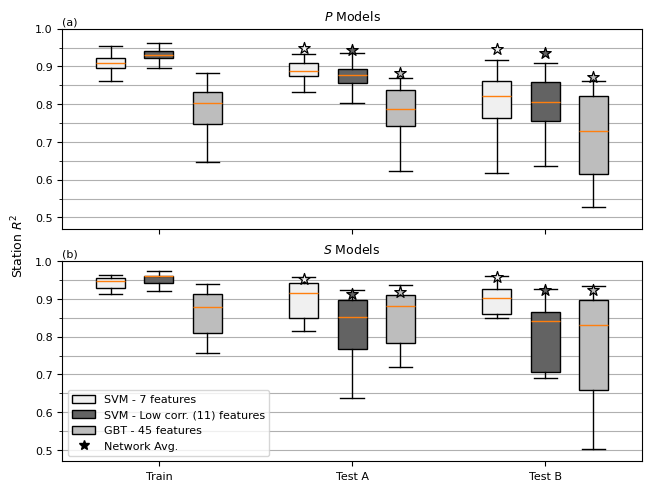

In [46]:
plotting.r2_boxplots(boxplots_dict, scatter_dict, label_dict, 
                     ylim=[0.47, 1.0],
                     savefigname='../figures/summaryFigR2BoxPlotsAdditionalModels.png')

Low corr r2 summary

In [36]:
print(p_lowc_results[p_lowc_results['holdout_r2'] > 0]['holdout_r2'].min())
print(p_lowc_results[p_lowc_results['holdout_r2'] < 0]['station'].values)
p_lowc_results[['train_r2', 'test_r2', 'holdout_r2']].describe().loc[['min', 'max', '50%']]

0.258
['YDC']


,train_r2,test_r2,holdout_r2
min,0.889,0.785,-3.153
max,0.961,0.936,0.908
50%,0.929,0.877,0.805


In [37]:
print(s_lowc_results[s_lowc_results['holdout_r2'] > 0]['holdout_r2'].min())
print(s_lowc_results[s_lowc_results['holdout_r2'] < 0]['station'].values)
s_lowc_results[['train_r2', 'test_r2', 'holdout_r2']].describe().loc[['min', 'max', '50%']]

0.343
['YML' 'YNM']


,train_r2,test_r2,holdout_r2
min,0.898,0.6380,-2.026
max,0.973,0.9230,0.926
50%,0.960,0.8525,0.841


In [42]:
s_lowc_results[s_lowc_results['holdout_r2'] < 0]

,train_r2,train_rmse,test_r2,test_rmse,holdout_r2,holdout_rmse,station,phase
9,0.973,0.097,0.809,0.244,-2.026,0.798,YML,S
15,0.961,0.111,0.839,0.206,-0.227,0.248,YNM,S


7 feats r2 summary

In [38]:
print(p_sub_results[p_sub_results['holdout_r2'] > 0]['holdout_r2'].min())
print(p_sub_results[p_sub_results['holdout_r2'] < 0]['station'].values)
p_sub_results[['train_r2', 'test_r2', 'holdout_r2']].describe().loc[['min', 'max', '50%']]

0.618
['YDC']


,train_r2,test_r2,holdout_r2
min,0.817,0.766,-3.866
max,0.954,0.934,0.916
50%,0.909,0.887,0.822


In [39]:
print(s_sub_results[s_sub_results['holdout_r2'] > 0]['holdout_r2'].min())
print(s_sub_results[s_sub_results['holdout_r2'] < 0]['station'].values)
s_sub_results[['train_r2', 'test_r2', 'holdout_r2']].describe().loc[['min', 'max', '50%']]

0.66
['YML']


,train_r2,test_r2,holdout_r2
min,0.857,0.8160,-0.982
max,0.964,0.9590,0.961
50%,0.948,0.9155,0.902


gbt r2 summary

In [40]:
print(p_gbt_results[p_gbt_results['holdout_r2'] > 0]['holdout_r2'].min())
print(p_gbt_results[p_gbt_results['holdout_r2'] < 0]['station'].values)
p_gbt_results[['train_r2', 'test_r2', 'holdout_r2']].describe().loc[['min', 'max', '50%']]

0.1277931663987825
['YDC']


,train_r2,test_r2,holdout_r2
min,0.646494,0.622294,-3.904963
max,0.883572,0.870568,0.860126
50%,0.801831,0.786558,0.729415


In [41]:
print(s_gbt_results[s_gbt_results['holdout_r2'] > 0]['holdout_r2'].min())
print(s_gbt_results[s_gbt_results['holdout_r2'] < 0]['station'].values)
s_gbt_results[['train_r2', 'test_r2', 'holdout_r2']].describe().loc[['min', 'max', '50%']]

0.5019996540028444
['YML']


,train_r2,test_r2,holdout_r2
min,0.755906,0.579910,-7.122966
max,0.940822,0.937879,0.933174
50%,0.878540,0.880710,0.830661


In [33]:
s_gbt_results

,station,train_r2,test_r2,holdout_r2
0,YHB,0.940400,0.937879,0.933174
1,YHL,0.906257,0.913347,0.857942
2,YMR,0.913414,0.903444,0.896393
3,YHH,0.846770,0.816218,0.805882
4,B207,0.883711,0.883420,NaN
5,FLWY,0.791913,0.719554,0.632912
6,YUF,0.912245,0.905528,0.896621
7,YPP,0.901123,0.829350,0.830661
8,YNR,0.938136,0.928077,0.915527
9,YML,0.773169,0.746212,-7.122966
